In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,70.0,NaN,130.0,322.0,0.0,NaN,109.0,0.0,NaN,2.0,NaN,3.0
1,NaN,67.0,3.0,115.0,NaN,0.0,2.0,160.0,NaN,1.6,2.0,0.0,7.0
2,NaN,NaN,2.0,124.0,261.0,NaN,0.0,141.0,0.0,0.3,NaN,0.0,7.0
3,NaN,NaN,4.0,NaN,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,NaN,120.0,269.0,0.0,NaN,121.0,1.0,0.2,NaN,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,NaN,3.0,172.0,199.0,1.0,0.0,162.0,0.0,NaN,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,NaN,192.0,NaN,NaN,148.0,0.0,0.4,NaN,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	58
float64		column 2	58
float64		column 3	42
float64		column 4	44
float64		column 5	42
float64		column 6	86
float64		column 7	86
float64		column 8	28
float64		column 9	42
float64		column 10	70
float64		column 11	44
float64		column 12	42
float64		column 13	42


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,212.000000,212.000000,228.000000,226.000000,228.000000,184.000000,184.000000,242.000000,228.000000,200.000000,226.00000,228.000000,228.000000
mean,0.650943,54.603774,3.184211,131.234513,249.013158,0.125000,1.086957,149.933884,0.333333,1.046500,1.59292,0.657895,4.596491
std,0.477800,9.008347,0.905838,17.577583,46.319374,0.331621,0.998930,22.396182,0.472442,1.030338,0.62021,0.922828,1.922367
min,0.000000,29.000000,1.000000,94.000000,149.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.00000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,214.750000,0.000000,0.000000,138.000000,0.000000,0.000000,1.00000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.900000,2.00000,0.000000,3.000000
75%,1.000000,60.250000,4.000000,140.000000,275.250000,0.000000,2.000000,165.000000,1.000000,1.600000,2.00000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,409.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.00000,3.000000,7.000000


<AxesSubplot:>

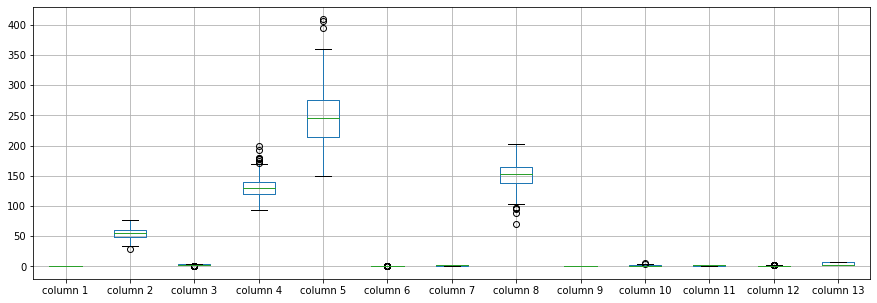

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.650943
column 2      54.603774
column 3       3.184211
column 4     131.234513
column 5     249.013158
column 6       0.125000
column 7       1.086957
column 8     149.933884
column 9       0.333333
column 10      1.046500
column 11      1.592920
column 12      0.657895
column 13      4.596491
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.038627,0.053479,-0.132507,-0.212042,-0.007475,0.164556,-0.049844,0.221331,0.119786,0.048672,0.127709,0.353527
column 2,-0.038627,1.000000,0.100450,0.241740,0.161525,0.082768,0.205086,-0.391592,0.094766,0.175775,0.185193,0.305851,0.093653
column 3,0.053479,0.100450,1.000000,-0.011337,0.155356,-0.114270,0.224282,-0.270630,0.358192,0.238619,0.155097,0.237481,0.265531
column 4,-0.132507,0.241740,-0.011337,1.000000,0.250485,0.131255,0.089292,-0.088463,0.112758,0.231612,0.158590,0.012914,0.027481
column 5,-0.212042,0.161525,0.155356,0.250485,1.000000,-0.017106,0.107894,-0.035753,0.117806,0.006386,0.061070,0.162355,0.013180
column 6,-0.007475,0.082768,-0.114270,0.131255,-0.017106,1.000000,0.052092,0.069689,-0.081981,0.085509,0.085900,-0.002579,0.015632
column 7,0.164556,0.205086,0.224282,0.089292,0.107894,0.052092,1.000000,-0.090297,0.112231,0.153348,0.167447,0.142662,0.050029
column 8,-0.049844,-0.391592,-0.270630,-0.088463,-0.035753,0.069689,-0.090297,1.000000,-0.395239,-0.348796,-0.369416,-0.335319,-0.250854
column 9,0.221331,0.094766,0.358192,0.112758,0.117806,-0.081981,0.112231,-0.395239,1.000000,0.392172,0.304864,0.141681,0.359264
column 10,0.119786,0.175775,0.238619,0.231612,0.006386,0.085509,0.153348,-0.348796,0.392172,1.000000,0.618250,0.201233,0.267731


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+90,13+90+90,13+90+90+90,13+90+90+90+90,13+90+90+90+90+90,13+90+90+90+90,13+90+90+90,13+90+90,13+90,13], vae_layer = False, seed = 90)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 520.1293468475342
Epoch: 1 , loss: 515.3543663024902
Epoch: 2 , loss: 513.9811725616455
Epoch: 3 , loss: 513.4716663360596
Epoch: 4 , loss: 514.8571910858154
Epoch: 5 , loss: 516.2219333648682
Epoch: 6 , loss: 514.6064586639404
Epoch: 7 , loss: 514.3804378509521
Epoch: 8 , loss: 515.6380996704102
Epoch: 9 , loss: 516.1588230133057
Epoch: 10 , loss: 512.7434062957764
Epoch: 11 , loss: 516.6331768035889
Epoch: 12 , loss: 514.1730194091797
Epoch: 13 , loss: 513.9397869110107
Epoch: 14 , loss: 513.942102432251
Epoch: 15 , loss: 512.996301651001
Epoch: 16 , loss: 507.2745475769043
Epoch: 17 , loss: 510.7605743408203
Epoch: 18 , loss: 504.77318382263184
Epoch: 19 , loss: 505.83786964416504
Epoch: 20 , loss: 503.5979690551758
Epoch: 21 , loss: 499.69993591308594
Epoch: 22 , loss: 491.72019386291504
Epoch: 23 , loss: 461.0162811279297
Epoch: 24 , loss: 421.7887477874756
Epoch: 25 , loss: 394.11694526672363
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       2.000000
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.197948
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      2.142502
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.238325,0.000000,0.813529,0.000000,0.00000,0.000000,-1.021133,0.0,0.000000,-1.039400,0.000000,-1.029472,0.0
1,0.171627,0.000000,0.000000,0.000000,-558.62765,0.000000,0.000000,0.0,0.063051,0.000000,0.000000,0.000000,0.0
2,-0.186899,7.086708,0.000000,0.000000,0.00000,0.379736,0.000000,0.0,0.000000,0.000000,1.146346,0.000000,0.0
3,0.076821,0.015625,0.000000,7.232391,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.193267,0.000000,0.00000,0.000000,-1.342063,0.0,0.000000,0.000000,-0.041745,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,-45.466984,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,-0.364076,0.000000,0.000000,0.0
266,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
267,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
268,0.000000,0.000000,0.000000,-70.578903,0.00000,0.277799,0.463091,0.0,0.000000,0.000000,-0.971972,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1383.2997440454303, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.2554686980720704

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8     186.000000
column 9       0.139571
column 10      0.000000
column 11      1.000000
column 12      1.154374
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.238325,70.000000,4.813529,130.000000,322.00000,0.000000,0.978867,109.0,0.000000,1.360600,2.000000,1.970528,3.0
1,0.171627,67.000000,3.000000,115.000000,5.37235,0.000000,2.000000,160.0,0.063051,1.600000,2.000000,0.000000,7.0
2,0.813101,64.086708,2.000000,124.000000,261.00000,0.379736,0.000000,141.0,0.000000,0.300000,2.146346,0.000000,7.0
3,1.076821,64.015625,4.000000,135.232391,263.00000,0.000000,0.000000,105.0,1.000000,0.200000,2.000000,1.000000,7.0
4,0.000000,74.000000,2.193267,120.000000,269.00000,0.000000,0.657937,121.0,1.000000,0.200000,0.958255,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,6.533016,3.000000,172.000000,199.00000,1.000000,0.000000,162.0,0.000000,0.135924,1.000000,0.000000,7.0
266,1.000000,44.000000,2.000000,120.000000,263.00000,0.000000,0.000000,173.0,0.000000,0.000000,1.000000,0.000000,7.0
267,0.000000,56.000000,2.000000,140.000000,294.00000,0.000000,2.000000,153.0,0.000000,1.300000,2.000000,0.000000,3.0
268,1.000000,57.000000,4.000000,69.421097,192.00000,0.277799,0.463091,148.0,0.000000,0.400000,1.028028,0.000000,6.0


In [20]:
imputations[-1].to_excel("Sheart_NG_20(imp).xlsx", index=False, header=False)